In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.patches import ConnectionPatch
from sklearn.metrics import r2_score

In [2]:
path = "sources-csv/data/COVID19Cases_geoRegion.csv"
path2 = "sources-csv/data/COVID19Hosp_vaccpersons.csv"
path3 = "sources-csv/data/COVID19Death_geoRegion_AKL10_w.csv"
path4 = "sources-csv/data/COVID19Death_vaccpersons_sex_w.csv"


In [3]:
def csv_to_df(path):
   return pd.read_csv(path)

In [5]:
df1 = csv_to_df(path)

In [25]:
df1

,geoRegion,datum,entries,sumTotal,timeframe_7d,offset_last7d,sumTotal_last7d,timeframe_14d,offset_last14d,sumTotal_last14d,...,inzsum14d,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last
0,CH,2020-02-24,1,1,False,3604195,0,False,3580485,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-05-03_06-06-15,day,1,0,16517
1,CH,2020-02-25,1,2,False,3604195,0,False,3580485,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-05-03_06-06-15,day,1,0,16517
2,CH,2020-02-26,10,12,False,3604195,0,False,3580485,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-05-03_06-06-15,day,10,0,16517
3,CH,2020-02-27,10,22,False,3604195,0,False,3580485,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-05-03_06-06-15,day,10,0,16517
4,CH,2020-02-28,10,32,False,3604195,0,False,3580485,0,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-05-03_06-06-15,day,10,0,16517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23195,ZH,2022-04-29,525,625130,True,622792,2338,True,617921,7209,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-05-03_06-06-15,day,0,525,3821
23196,ZH,2022-04-30,396,625526,True,622792,2734,True,617921,7605,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-05-03_06-06-15,day,0,396,3821
23197,ZH,2022-05-01,291,625817,True,622792,3025,True,617921,7896,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-05-03_06-06-15,day,0,291,3821
23198,ZH,2022-05-02,426,626243,True,622792,3451,True,617921,8322,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-05-03_06-06-15,day,0,426,3821


In [7]:
before_lock_df = df1[(df1["datum"] <= "2020-03-20")]

In [8]:
top_four_df = before_lock_df[(before_lock_df["geoRegion"] == "CH") | (before_lock_df["geoRegion"] == "ZH") | (before_lock_df["geoRegion"] == "BE") | (before_lock_df["geoRegion"] == "VD") 
                             | (before_lock_df["geoRegion"] == "AG")] 

In [9]:
top_four_c = ["ZH", "BE", "VD", "AG"]

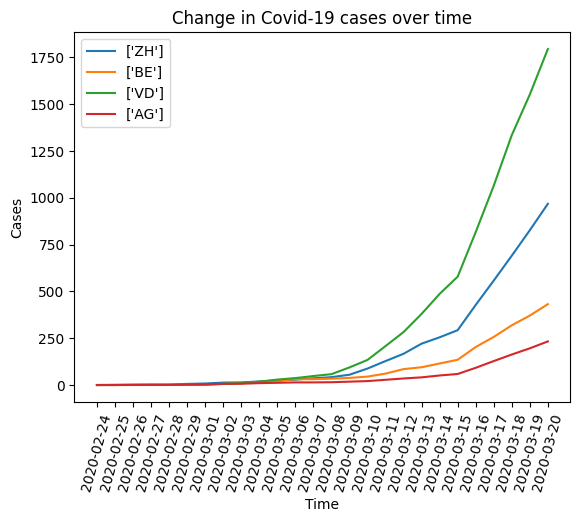

In [10]:
for c in top_four_c:
    df_temp = top_four_df[top_four_df["geoRegion"] == c]
    plt.plot(df_temp["datum"], df_temp["sumTotal"], label = df_temp["geoRegion"].unique())

plt.title("Change in Covid-19 cases over time")
plt.xticks(rotation = 75)
plt.xlabel("Time")
plt.ylabel("Cases")
plt.legend(loc="upper left")
plt.show()

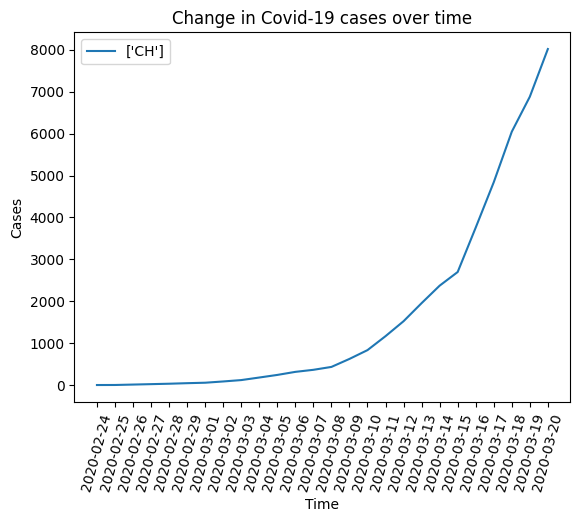

In [11]:
df_temp = before_lock_df[before_lock_df["geoRegion"] == "CH"]
plt.plot(df_temp["datum"], df_temp["sumTotal"], label = df_temp["geoRegion"].unique())
plt.title("Change in Covid-19 cases over time")
plt.xticks(rotation = 75)
plt.xlabel("Time")
plt.ylabel("Cases")
plt.legend(loc="upper left")
plt.show()

In [12]:
df_case_pop = df1[(df1["datum"] == "2022-05-03") & (df1["geoRegion"] != "CH")& (df1["geoRegion"] != "CHFL")]
df_case_pop = df_case_pop.sort_values(by=['pop'])


In [13]:
cantons = df_case_pop["geoRegion"]
populations = df_case_pop["pop"]
total_cases = df_case_pop["sumTotal"]

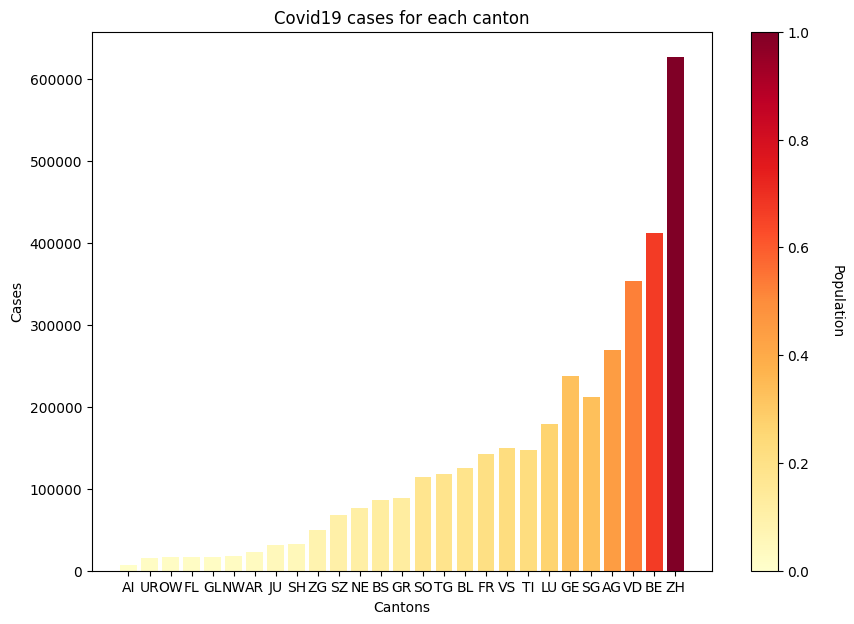

In [14]:
populations_n = [x / max(populations) for x in populations]
fig, ax = plt.subplots(figsize=(10, 7))
my_cmap = plt.cm.get_cmap('YlOrRd')
colors = my_cmap(populations_n)
rects = ax.bar(cantons, total_cases, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(populations_n)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Population', rotation=270,labelpad=25)
plt.title("Covid19 cases for each canton")
plt.xticks(cantons)
plt.xlabel("Cantons")
plt.ylabel("Cases")
plt.show() 

In [15]:
populations = list(populations)
cantons = list(cantons)
total_cases = list(total_cases)

#TEST FOR ---AR--LU---
population_test =  []
population_test.append(populations.pop(6))
population_test.append(populations.pop(19))

cantons_test = []
cantons_test.append(cantons.pop(6))
cantons_test.append(cantons.pop(19))

cases_test = []
cases_test.append(total_cases.pop(6))
cases_test.append(total_cases.pop(19))

print(cantons_test)
print(population_test)
print(cases_test)

['AR', 'LU']
[55309, 416347]
[22629, 179149]


0.9969057749957275


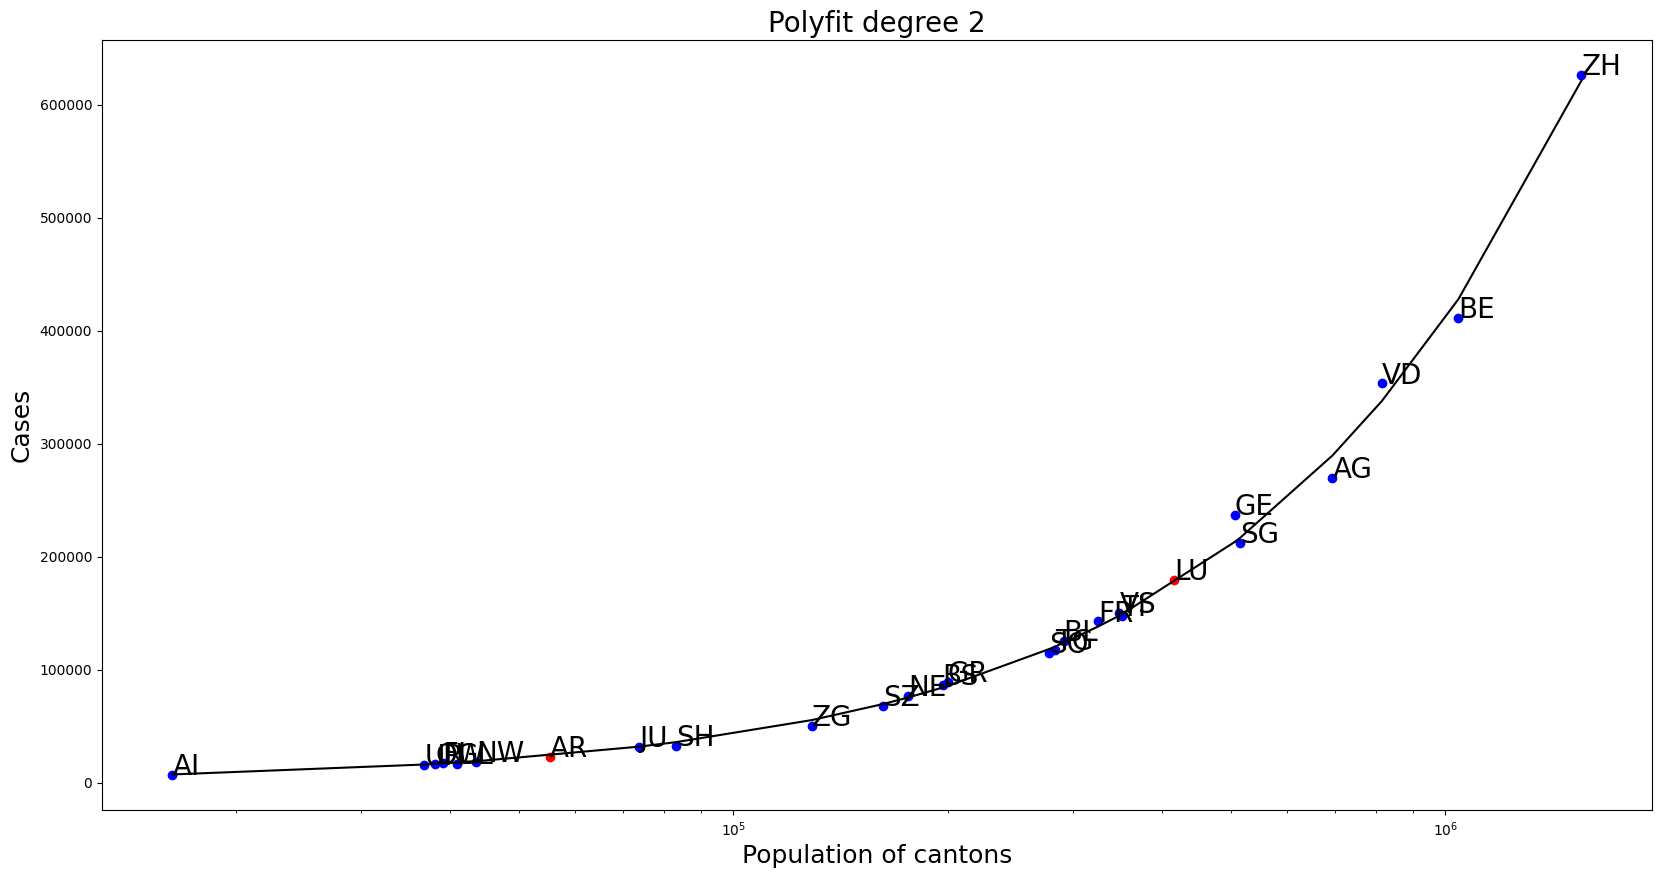

In [16]:
coefs = np.polyfit(populations, total_cases, 2)
plt.figure()
pred_train = np.polyval(coefs, populations)
pred_test = np.polyval(coefs, population_test)
r2 = r2_score(total_cases, pred_train)
print(r2)
plt.plot(populations, pred_train, color="black")
plt.title("Polyfit degree "+str(2), fontsize = 20)
plt.scatter(populations,total_cases, color = "blue")
plt.scatter(population_test, cases_test, color ="red")
for i in range(len(populations)):
    plt.text(populations[i], total_cases[i], cantons[i], fontsize = 20)

for i in range(len(population_test)):
     plt.text(population_test[i], cases_test[i], cantons_test[i], fontsize = 20)
plt.xscale("log")
plt.gcf().set_size_inches(20, 10)
plt.xlabel("Population of cantons", fontsize = 18)
plt.ylabel("Cases", fontsize = 18)
plt.show()

In [16]:
df3 = csv_to_df(path3)

In [17]:
df3.columns

Index(['altersklasse_covid19', 'geoRegion', 'datum', 'entries',
       'timeframe_all', 'timeframe_phase2', 'timeframe_phase2b',
       'timeframe_phase3', 'timeframe_phase4', 'timeframe_phase5',
       'timeframe_phase6', 'timeframe_vacc_info', 'timeframe_28d',
       'timeframe_14d', 'sumTotal', 'offset_vacc_info', 'sumTotal_vacc_info',
       'freq', 'prct', 'pop', 'inz_entries', 'inzsumTotal', 'type',
       'type_variant', 'version', 'datum_unit', 'datum_dboardformated',
       'entries_diff_abs', 'entries_diff_inz', 'entries_diff_pct',
       'prct_diff'],
      dtype='object')

In [18]:
labels = df3["altersklasse_covid19"].unique()[:-1]
dates = df3["datum"].unique()

In [23]:
max(df3.datum.unique())

202217

In [19]:
data_2d = np.zeros((len(labels), len(dates)))
for l in range(len(labels)):
    for d in range(len(dates)):
        data_2d[l,d] = df3[(df3["altersklasse_covid19"] == labels[l]) & (df3["datum"] == dates[d]) & (df3["geoRegion"] == "CH")]["sumTotal"]


<ipython-input-20-cf34bc4a0636>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


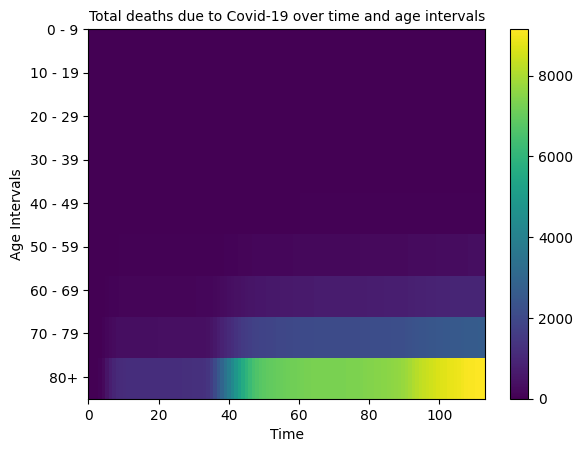

In [20]:
fig, ax = plt.subplots()
shw = ax.imshow(data_2d, extent=[0,113, 8.5, 0],  aspect='auto')
plt.xlabel("Time")
plt.ylabel("Age Intervals")
ax.set_yticklabels(labels)
plt.title("Total deaths due to Covid-19 over time and age intervals", fontsize = 10)
plt.colorbar(shw)
plt.show()


In [24]:
df3[(df3["altersklasse_covid19"] == '0 - 9') & (df3["datum"] == 202010) & (df3["geoRegion"] == "CH")]

,altersklasse_covid19,geoRegion,datum,entries,timeframe_all,timeframe_phase2,timeframe_phase2b,timeframe_phase3,timeframe_phase4,timeframe_phase5,...,inzsumTotal,type,type_variant,version,datum_unit,datum_dboardformated,entries_diff_abs,entries_diff_inz,entries_diff_pct,prct_diff
10,0 - 9,CH,202010,0,True,False,False,False,False,False,...,0.0,COVID19Death,altersklasse_covid19,2022-05-03_06-06-15,isoweek,2020-10,0.0,0.0,NaN,NaN


In [25]:
df4 = csv_to_df(path4)

In [29]:
df4

,date,sex,vaccination_status,entries,sumTotal,pop,inz_entries,inzsumTotal,geoRegion,type,type_variant,vaccine,data_completeness,version,timeframe_all
0,202104,female,fully_vaccinated,0,0,9344.0,0.00,NaN,CHFL,COVID19Death,vaccine,all,limited,2022-05-03_06-06-15,True
1,202104,female,partially_vaccinated,4,4,162054.0,2.47,NaN,CHFL,COVID19Death,vaccine,all,limited,2022-05-03_06-06-15,True
2,202104,female,not_vaccinated,21,21,4215990.0,0.50,NaN,CHFL,COVID19Death,vaccine,all,limited,2022-05-03_06-06-15,True
3,202104,female,unknown,58,58,NaN,NaN,NaN,CHFL,COVID19Death,vaccine,all,limited,2022-05-03_06-06-15,True
4,202104,male,fully_vaccinated,0,0,7107.0,0.00,NaN,CHFL,COVID19Death,vaccine,all,limited,2022-05-03_06-06-15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,202215,all,fully_vaccinated_no_booster,7,702,2288417.0,0.31,NaN,CHFL,COVID19Death,vaccine,all,intermediate,2022-05-03_06-06-15,True
1580,202216,all,fully_vaccinated_first_booster,11,372,3738009.0,0.29,NaN,CHFL,COVID19Death,vaccine,all,intermediate,2022-05-03_06-06-15,True
1581,202216,all,fully_vaccinated_no_booster,0,702,2283081.0,0.00,NaN,CHFL,COVID19Death,vaccine,all,intermediate,2022-05-03_06-06-15,True
1582,202217,all,fully_vaccinated_first_booster,4,376,3744853.0,0.11,NaN,CHFL,COVID19Death,vaccine,all,intermediate,2022-05-03_06-06-15,False


In [30]:
vaccination_status = ["fully_vaccinated_first_booster", "fully_vaccinated", "partially_vaccinated", "not_vaccinated"]
death_by_vacc = []
for v in vaccination_status:
    male_death = df4[(df4["vaccination_status"] == v) & (df4["sex"] == "male")]["sumTotal"].sum()
    female_death = df4[(df4["vaccination_status"] == v) & (df4["sex"] == "female")]["sumTotal"].sum()
    total = male_death + female_death
    death_by_vacc.append([round(male_death/total,3), round(female_death/total,3)])    

In [31]:
death_by_vacc

[[0.565, 0.435], [0.554, 0.446], [0.543, 0.457], [0.551, 0.449]]

In [32]:
category_names = ['Male', 'Female']
results = {
    'Fully Vaccinated with One Booster': death_by_vacc[2],
    'Fully Vaccinated': death_by_vacc[0],
    'Partially Vaccinated': death_by_vacc[1],
    'Not Vaccinated': death_by_vacc[3],
}

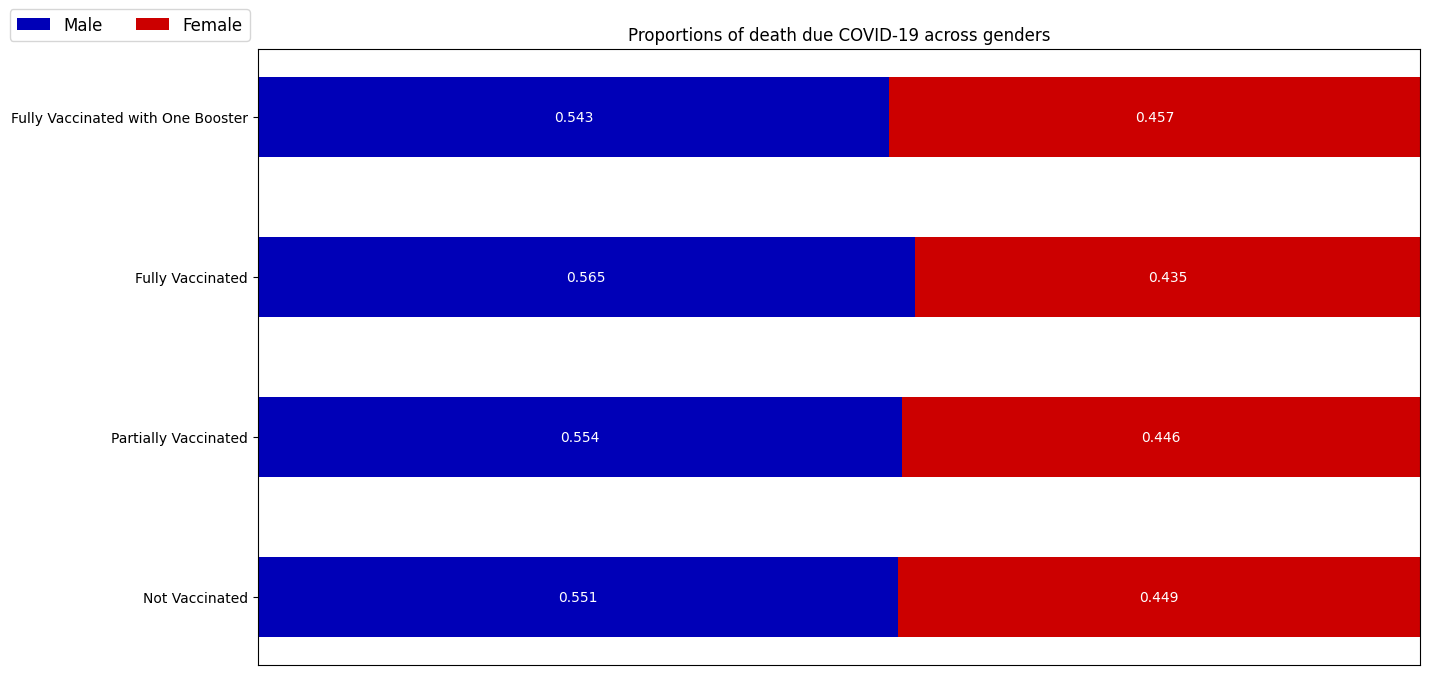

In [44]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['seismic'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower right', fontsize= "large")

    return fig, ax


survey(results, category_names)
plt.title("Proportions of death due COVID-19 across genders")
plt.show()